In [1]:
# Decision Trees is the first example
# Random Forest is the second example (which tends to outperform decision trees)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('kyphosis.csv')
print(df.head())
print(df.info())
print(df.describe())

# the TARGET CLASS is Kyphosis - you still have the condition after the treatment or not
df['Kyphosis'].value_counts() # you can see the data has a bias towards Kyphosis is absent

  Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB
None
              Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000


absent     64
present    17
Name: Kyphosis, dtype: int64

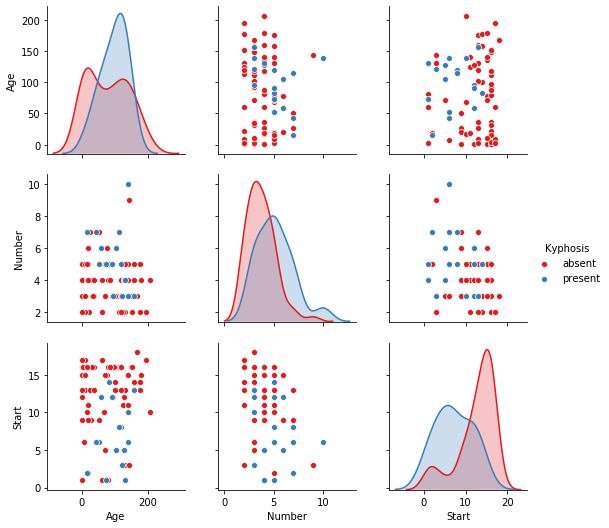

In [2]:
# visualize the data
# the first column (column 0) is the hue so skip it using vars
sns.pairplot(df, hue='Kyphosis', vars=df.columns[1:], palette='Set1')


   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

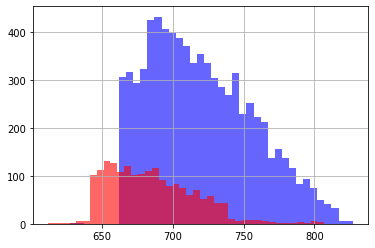

In [3]:
# some other ways to visualize the data - diff dataset though but same concept
df2 = pd.read_csv('loan_data.csv')
print(df2.head())

df2[df2['credit.policy']==1]['fico'].hist(bins=40, color='blue',label='credit policy 1', alpha = 0.6)
df2[df2['credit.policy']==0]['fico'].hist(bins=40, color='red', label='credit policy 0', alpha = 0.6)

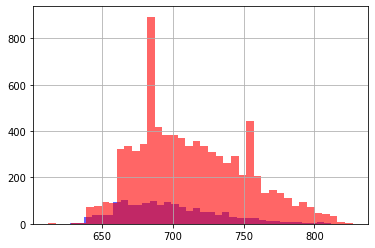

In [4]:
# some other ways to visualize the data - diff dataset though but same concept
df2[df2['not.fully.paid']==1]['fico'].hist(bins=40, color='blue',label='not fully paid 1', alpha = 0.6)
df2[df2['not.fully.paid']==0]['fico'].hist(bins=40, color='red', label='not fully paid 0', alpha = 0.6)

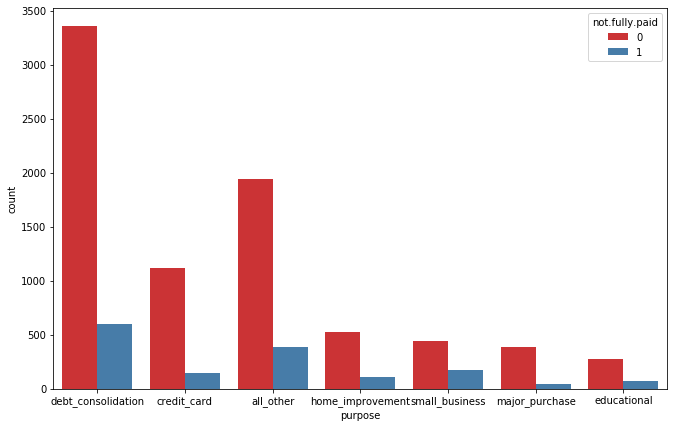

In [5]:
# some other ways to visualize the data - diff dataset though but same concept
plt.figure(figsize=(11,7))
sns.countplot(x='purpose', hue='not.fully.paid', data=df2,palette='Set1')

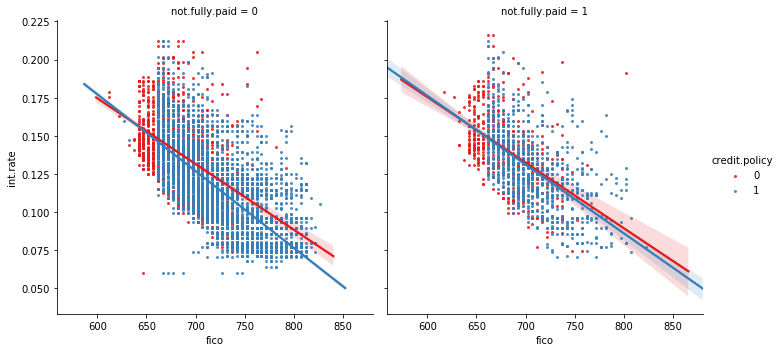

In [6]:
# some other ways to visualize the data - diff dataset though but same concept
sns.lmplot(y='int.rate',x='fico',data=df2,hue='credit.policy', col='not.fully.paid', palette='Set1',scatter_kws={"s": 4})

In [7]:
# some other ways to visualize the data - diff dataset though but same concept
# if categorical data, must convert to dummies, then drop first
cat_feats = ['purpose']
final_data = pd.get_dummies(df2, columns=cat_feats,drop_first=True)
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [8]:
# Create training set - going back to original set of data df1 using Kyphosis data set

from sklearn.model_selection import train_test_split
# create X and y variables
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [9]:
# Decision Tree Model 
# Create an instance of DecisionTreeClassifier() called dtree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

pred = dtree.predict(X_test)

# on the results, run a classification report and a confusion matrix to see how good the model is
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\nClassification Matrix: ')
print(classification_report(y_test,pred))

Confusion Matrix: 
[[14  8]
 [ 2  1]]

Classification Matrix: 
              precision    recall  f1-score   support

      absent       0.88      0.64      0.74        22
     present       0.11      0.33      0.17         3

    accuracy                           0.60        25
   macro avg       0.49      0.48      0.45        25
weighted avg       0.78      0.60      0.67        25



features:  ['Age', 'Number', 'Start']


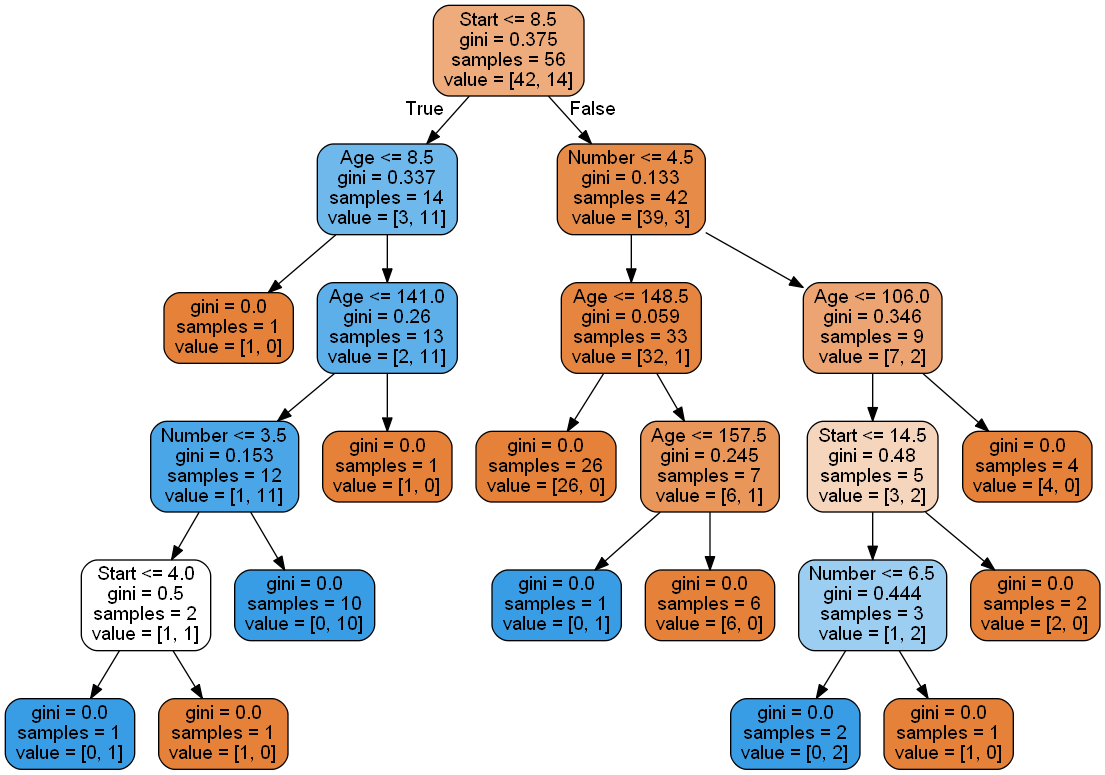

In [10]:
# Visualize the decision tree

# 1) pip install pydot
# 2) install graphviz library from graphviz.org
# 3) set PATH variable to include "C:\Program Files (x86)\Graphviz2.38\bin\"
# 4) conda install graphviz
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

from IPython.display import Image
# from sklearn.externals.six import StringIO # deprecated so use from io import StringIO
from io import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:]) # drop the first column for Kyphosis (which is the target)
print('features: ', features)

# Create Input Output
dot_data = StringIO()

# 
export_graphviz(dtree, 
                out_file=dot_data,
                feature_names=features,
                filled=True,
                # class_names=['[y=0], '[y=1]'],
                rounded=True)


# save decision tree file down
(graph,)=pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')

# show in jupyter notebook
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [11]:
# Random Forest Classifier Model 
# Random Forests typically outperform single Decision Tree
# Depends on Precision or Recall needs

n_est = 200 # number of estimators
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=n_est)
rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

# on the results, run a classification report and a confusion matrix to see how good the model is
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
print('Confusion Matrix: ')
print(confusion_matrix(y_test, pred))
print('\nClassification Matrix: ')
print(classification_report(y_test,pred))

Confusion Matrix: 
[[18  4]
 [ 3  0]]

Classification Matrix: 
              precision    recall  f1-score   support

      absent       0.86      0.82      0.84        22
     present       0.00      0.00      0.00         3

    accuracy                           0.72        25
   macro avg       0.43      0.41      0.42        25
weighted avg       0.75      0.72      0.74        25

